In [30]:
import pandas as pd
import numpy as np
import math
import matplotlib as plt
import seaborn as sns

C:\Users\welcome\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv("H:\data_inn.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# Descriptive Statistics and Python Implementation

## Mean:


It is the sum of observations divided by total number of observations. Usually represented by m and given as
- $  \mu = \frac{\Sigma x_{i}} {n} $
               


### Example 

mean of [4,5,9,6,] is given as
$ m = (4+5+9+6)/4 = 24/4 = 6 $


#### Python Implementation

In [12]:
sum = 0
for i in range(len(df['No_of_Fly_Members'])):
    sum =sum + df['No_of_Fly_Members'][i]
n =len(df['No_of_Fly_Members'])
mean = sum/n
print(mean)

4.06


## Median:

It is the number at $(n+1)/2^{th}$ position in the ordered list. Where n is the number of observations. It is represented by M.



### Formula 
 $ \frac {n+1} {2} $  if the n is odd  

 $ \frac {n+1} {2} $ and $ \frac {n} {2} $ 

### Example:
- l = [1,3,3,6,7,8,9]
- Median of l = 6

### Code Implementation:

In [23]:
n = len(df['No_of_Fly_Members'])
df['No_of_Fly_Members'].sort_values()

if n % 2 == 0:
    a = df['No_of_Fly_Members'][n/2]
    b = df['No_of_Fly_Members'][(n/2)-1]
    median = (a + b)/2
else:
    median = df['No_of_Fly_Members'][n/2]
print("Median is: " + str(median))

Median is: 3.5


## Mode:


It is the most frequently occured number in the data.


### Code implementation

In [16]:

for col in df.columns:
  n = 0
  l1 = []
  l = list(df[col].unique())
  for i in l:
      a = list(df[col]).count(i)
      if a not in l1:
          l1.append(a)
      mode_value = sorted(l1,reverse = True)[0]
  for i in l:
      a = list(df[col]).count(i)
      if(a == mode_value):
          print(col + "Mode is", i)
          break

Mthly_HH_IncomeMode is 45000
Mthly_HH_ExpenseMode is 25000
No_of_Fly_MembersMode is 4
Emi_or_Rent_AmtMode is 0
Annual_HH_IncomeMode is 590400
Highest_Qualified_MemberMode is Graduate
No_of_Earning_MembersMode is 1


## Variance:


It is a measure of spread between numbers in a dataset.

## Formula
## $ \frac {\Sigma (x_{i} - \mu)^2} {n-1} $

In [27]:
sum = 0
var = 0
for i in range(len(df['No_of_Fly_Members'])):
    sum =sum + df['No_of_Fly_Members'][i]
n =len(df['No_of_Fly_Members'])
mean = sum/n
for i in range(len(df['No_of_Fly_Members'])):
    var = var + (df['No_of_Fly_Members'][i] - mean)**2
variance = var / (n-1)
print("Variance is",variance)

Variance is 2.302448979591837


## Standard Deviation:


It is the average deviation from the mean and represented as $\sigma^2$

#### Formula

### $ { \sigma } = \sqrt \frac {(\Sigma x_i - \mu)^2} {n-1} $


where
$ \sigma $ = standard deviation
N = size of the data
$ x_i $ = each value from the data
$ \mu $ = mean

### Code implementation

In [32]:
sum = 0
var = 0
for i in range(len(df['No_of_Fly_Members'])):
    sum =sum + df['No_of_Fly_Members'][i]
n =len(df['No_of_Fly_Members'])
mean = sum/n
for i in range(len(df['No_of_Fly_Members'])):
    std = math.sqrt(var + (df['No_of_Fly_Members'][i] - mean)**2)
std = std / (n-1)
print("Standard Deviation is",std)

Standard Deviation is 0.03959183673469389


# Correlation:


It refers to the extent to which two variables have a linear relationship with each other. It is a statistical technique that can show how strongly variables are related. It is a scaled version of co-variance and values ranges from -1 to +1.


#### Variables within a dataset can be related for lots of reasons
- One variable could cause or depend on the values of another variable.
- One variable could be lightly associated with another variable.
- Two variables could depend on a third unknown variable.


## Formula:

### $ r_{xy} = \frac {\Sigma(x_i - \mu _x)(y_i - \mu _y)} {\sqrt{\Sigma (x_i - \mu _x)^2 \Sigma(y_i - \mu _y)^2}} $

In [19]:
X = df['Mthly_HH_Income']
Y = df['Mthly_HH_Expense']

# Mean of two columns
mean_X = X.mean()
mean_Y = Y.mean()

# Numerator
num = 0
for i in range(len(X)):
   num = num + (X[i]-mean_X)*(Y[i]-mean_Y)

# Denominator
d_x = 0
for i in range(len(X)):
   d_x = d_x + (X[i]-mean_X)**2
   
d_y = 0
for i in range(len(Y)):
   d_y = d_y + (Y[i]-mean_Y)**2
   
d = math.sqrt(d_x * d_y)

# Correlation
corr = num/d
print(corr)

0.6492152549316461


## Normal Distribution:




It is a continuous probability distribution that is described by the probability density function(pdf). The PDF describes the    probability of a certain value of the experiment falling into a particular range of values. It includes a normalizing constant that ensures  the area under the curve is equal to one (the sum of all event probabilities must equal one). The total area under the curve is divided in ½ around the mean.


[![Alt Text](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png) " Normal Distribution(Bell Curve) "](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.pnghttps://www.google.com/url?sa=i&url=https%3A%2F%2Fsphweb.bumc.bu.edu%2Fotlt%2FMPH-Modules%2FPH717-QuantCore%2FPH717-Module6-RandomError%2FPH717-Module6-RandomError5.html&psig=AOvVaw3ax0-yh62GCs-wWJdjAIAJ&ust=1612343784488000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCLDL1u_uyu4CFQAAAAAdAAAAABAX) 

### Formula


 $ f(x) = \frac {1}{\sigma \sqrt {2 \pi}} e^\frac {-(x -\mu)^2}{2 \sigma^2} $

### Features of a normal distribution
- It is symmetric

- The mean median and mode are equal

- Emphirical rule

  68.25% of all cases fall within +/-  $ 1\sigma $ from the mean
  
  95% of all cases fall within +/- $ 2 \sigma $ from the mean
  
  99% of all cases fall within +/- $ 3 \sigma $ from the mean
 
 
- Skewness and Kurtosis - These are the coefficients that measure how different a distribution is from a normal distribution
  
  Skewness measures the symmetry of a normal distribution while kutosis measures the thickness of the tail ends relative to the tails of the normal distribution

### Formula for skewness and kurtosis

$ skew = \frac {n} {(n-1)(n-2)} \Sigma(\frac{x_i - \mu} {s})^{3} $

### Effect on Mean, Median and Mode due to Skewness


### Positively skewed distribution



Positively Skewed Distribution is a type of distribution where the mean, median and mode of the distribution are positive rather than negative or zero i.e., data distribution occurs more on the one side of the scale with long tail on the right side.


 [![Alt Text](https://cdn.corporatefinanceinstitute.com/assets/Positively-Skewed-Distribution.png "Positively Skewed Distribution")](https://www.google.com/url?sa=i&url=https%3A%2F%2Fcorporatefinanceinstitute.com%2Fresources%2Fknowledge%2Fother%2Fpositively-skewed-distribution%2F&psig=AOvVaw3tm-j6M3hbWDdBQsNVvykN&ust=1612350526395000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCMDBqvSHy-4CFQAAAAAdAAAAABAI)

### Negatively Skewed Distribution



Negatively skewed distribution refers to the distribution type where the more values are plotted on the right side of the graph, where the tail of the distribution is longer on the left side and the mean is lower than the median and mode which it might be zero or negative due to the nature of the data as negatively distributed.

[![Alt Text](https://cdn.corporatefinanceinstitute.com/assets/negatively-skewed-distribution-1024x530.png "Negatively Skewed Distribution")](https://www.google.com/url?sa=i&url=https%3A%2F%2Fcorporatefinanceinstitute.com%2Fresources%2Fknowledge%2Fother%2Fnegatively-skewed-distribution%2F&psig=AOvVaw2j5Cz4dS1rZCGWRKpMoXln&ust=1612351088512000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJDZm4CKy-4CFQAAAAAdAAAAABAD)

### Code Implementation

In [4]:
x = df['Mthly_HH_Expense']
m = x.mean()
s = x.std()
for i in range(len(x)):
    a = math.exp(-((x[i] - m)**2 /2*(s)**2))
    b = s* math.sqrt(2*3.14)

normal = a/b
print(normal)

0.0


In [11]:
def normalization(a):
    maximum = max(a)
    minimum = min(a)
    norm_list = []


    for i in range(len(a)):

        value = (a[i]-minimum)/(maximum - minimum)

        norm_list.append(value)

    print (norm_list)

In [12]:
normalization(df['Mthly_HH_Expense'])

[0.125, 0.10416666666666667, 0.052083333333333336, 0.0, 0.20833333333333334, 0.125, 0.2916666666666667, 0.375, 0.14583333333333334, 0.14583333333333334, 0.3333333333333333, 0.4791666666666667, 0.0625, 0.17708333333333334, 0.16666666666666666, 0.21458333333333332, 0.375, 0.16666666666666666, 0.09583333333333334, 0.22916666666666666, 0.4791666666666667, 0.2708333333333333, 0.3541666666666667, 0.4791666666666667, 0.20833333333333334, 0.4791666666666667, 0.125, 0.16666666666666666, 0.2708333333333333, 0.20833333333333334, 0.4791666666666667, 0.7916666666666666, 0.16666666666666666, 0.4166666666666667, 0.4791666666666667, 0.2708333333333333, 0.375, 0.375, 0.8958333333333334, 0.16666666666666666, 1.0, 0.375, 0.14583333333333334, 0.375, 0.4791666666666667, 0.9583333333333334, 0.4791666666666667, 0.5833333333333334, 1.0, 0.7916666666666666]


#### Skewness

In [23]:
def median_fun(a):
    k = len(df)/2
    if (len(a)%2==0):
        s_l=sorted(list(a),reverse=True)
        m=(s_l[int(k)-1]+s_l[int(k)])/2
        return (m)

In [24]:
def mean_fun(a):
    sum = 0
    n = 0
    for j in a:
        sum = sum+j
        n =n+1
    return (sum/n)

In [25]:
def std_fun(a):
    sum = 0
    b = mean_fun(a)
    for j in a:
        sum = sum + ((j-b)**2)
    return (math.sqrt(sum/len(a)))

In [26]:
def  skewness_fun(a):
    a=((mean_fun(a)-median_fun(a)))/std_fun(a)
    return a

In [27]:
numeric_columns=[]
for col in df.columns:
    if (df[col].dtype !='O'):
        numeric_columns.append(col)

In [28]:
for i in numeric_columns:
    print(i+"  Skewness is ",skewness_fun(df[i]))

Mthly_HH_Income  Skewness is  0.253835676742402
Mthly_HH_Expense  Skewness is  0.2772229970354436
No_of_Fly_Members  Skewness is  0.03994323218711281
Emi_or_Rent_Amt  Skewness is  0.49524937972151156
Annual_HH_Income  Skewness is  0.13441648734800632
No_of_Earning_Members  Skewness is  0.6328145078635634


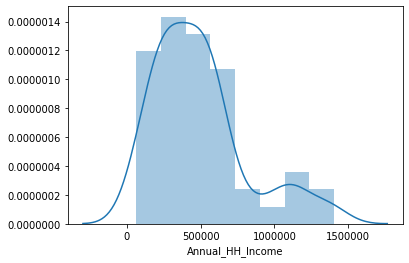

In [35]:
sns.distplot(df['Annual_HH_Income']  )
#Negatively skewed variable, may be having chance of outliers at the extreme right end